In [236]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
from itertools import chain

In [237]:
rca_comp = 0 # rca component to look at 
harmo = 0 # harmonic to look at 0-3 : 2, 4,6,8

In [238]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_Fx_OutputData\\RCA_Files\\' # set dir - on my computer
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Avilable Files to choose from: {len(d)}')
print(f'Files on hand: {d}')
##############################################
FileN_f1 = d[1] # choose one
FileN_f2  = d[3]                         
file_path1 = os.path.join(MainDir, FileN_f1) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

file_path2 = os.path.join(MainDir, FileN_f2) # join paths and prep 2 load
print('Current WD:',file_path2) # does path exist ... ?
print('Does File #2 Exist?',os.path.exists(file_path1)) # yes or no

Avilable Files to choose from: 5
Files on hand: ['desktop.ini', 'OfficialF1_Control_rcaResults_Sweep.mat', 'OfficialF1_rcaResults_Sweep_F2F4F6F8.mat', 'OfficialF2_Control_rcaResults_Sweep.mat', 'OfficialF2_rcaResults_Sweep_F2F4F6F8.mat']
Current WD: C:\plimon\LTP_analysis\RCA_Fx_OutputData\RCA_Files\OfficialF1_Control_rcaResults_Sweep.mat
Does File #1 Exist? True
Current WD: C:\plimon\LTP_analysis\RCA_Fx_OutputData\RCA_Files\OfficialF2_Control_rcaResults_Sweep.mat
Does File #2 Exist? True


In [239]:
df_f1 = scipy.io.loadmat(file_path1)
df_f2 = scipy.io.loadmat(file_path2)

In [240]:
rca_f1 = df_f1['rcaResult']['projectedData'][0,0]
f1 = [rca_f1[x,0] for x in range(rca_f1.shape[0])] # entry per subject

In [241]:
F1_noise = df_f1['rcaResult']['noiseData'][0,0]
noise_f1 = [F1_noise[x,0] for x in range(F1_noise.shape[0])][0][0]# entry per subject

In [242]:
rca_f2 = df_f2['rcaResult']['projectedData'][0,0]
f2 = [rca_f2[x,0] for x in range(rca_f2.shape[0])]

In [243]:
F2_noise = df_f2['rcaResult']['noiseData'][0,0]
noise_f2 = [F2_noise[x,0] for x in range(F2_noise.shape[0])][0][0]# entry per subject

In [244]:
# load subject names ...
SubNames = df_f1['rcaResult'][0,0][5]
FileName = [x[0][3:] for subjlist in SubNames for x in subjlist[0][2][0]]
print(f'Total Data Files: {len(FileName)}')

Total Data Files: 10


In [245]:
str_split = '-'  # strong to index sub name and expt cond.
labels = ['Potentiated Stim, Attention Congruent','Non-Potentiated Stim, Attention Congruent','No Stim, Attention Incongruent, F1 ','No Stim, Attention Incongruent, F2']
contrast_labs = ['1%','3%','5%','16%','40%','100%']
# custom colors
colors = ["#FF0B04", "#4374B3", "#228B22", "#8A2BE2"]
# Set color palette
sns.set_palette(sns.color_palette(colors))

In [246]:
# set all file names to the same hyphen format
FileName = [FileName.replace('_','-') for FileName in FileName]
NumFiles = int(len(FileName))
# Find How Many Subject Names There are ...
string_ind = '-'
uniqueSubs = []
SessFileType = []
'for each file name, get sub ID and also session record'
for n in range(NumFiles):
    x = FileName[n] # single file name string ie: 'nl-xxxx_attnX'
    if string_ind in x:
        y = x.split(string_ind)[0] # get subj number
        #print(y)
        z = x.split(string_ind)[1] # get session condition name 
        # from each session name extract import info that will help us index and exclude later on ..
        uniqueSubs.append(y) # store all participant numbers (repeating - will be sorted later)
        SessFileType.append(z) # store the condtion label

In [247]:
subjLen  = int(len(uniqueSubs))
SessFileType = ['attnR' for in range(subjLen)]
print(SessFileType)

['attnR', 'attnR', 'attnR', 'attnR', 'attnR', 'attnR', 'attnR', 'attnR', 'attnR', 'attnR']


In [248]:
print(f'Subject IDs: {uniqueSubs}')
print(f' Conditions: {SessFileType[0:2]}')

Subject IDs: ['2738', '2740', '2742', '2745', '2746', '2751', '2769', '345202', '345215', '345216']
 Conditions: ['attnR', 'attnR']


In [249]:
# given double sessions.., how many unique participants do we have?
TotalFiles = np.array(uniqueSubs)
[NumSubs, SessCounts] = np.unique(TotalFiles, return_counts = True) # returns unique subject and how many sessions they did (should be 2)
print(f'Total Participants: {len(NumSubs)}')
[FileQuants, TotSess] = np.unique(SessCounts, return_counts = True) # returns counts of how many subs did 1 session and 2 sessions 

Total Participants: 10


In [250]:
print(NumSubs)

['2738' '2740' '2742' '2745' '2746' '2751' '2769' '345202' '345215'
 '345216']


In [251]:
#dataSet_Inds = ['2651','2658','2659','2661','2664','2666','2668','2672','2674','2695','345202','345215','2715','2726']
ds_set = NumSubs
print(len(ds_set))
#dubSubs = ['2652']
# for control subjects: 
'subject 2749 has one additional block of post, so will modify code for this chunk only'
badSubs = ['5555']#['2745', '345215'] 
# for LTP Subjects
#badSubs = ['2661','2669','2671','2716','2663','2652'] # reasonable exclusions...
#badSubs = ['2652','2663','2655','2657','2661','2668','2669','2671','2696','2660','2678','2627'] # most conservative ec : activity across all conditions decreased and/or very noisy crf's 
filter_noisySubs = [x for x in ds_set if x not in badSubs ]
dataSet_Inds = filter_noisySubs
print(len(dataSet_Inds))

10
10


In [252]:
# total number of file sessions!
sCount = [x for x in uniqueSubs if x not in badSubs]
print(len(sCount))

10


In [282]:
'init dicts to save data'
ProcessedConditionData = {} # pcd processed condition data
diffs = {} # post - pre  / post + pre data
ProcessedComplexVals = {}
noise = {}
####################################################
'make empty df for missing values to still get plots'
emptyMat = np.zeros((48,4,78))
emptyMat[:] = np.nan
NumTrialsRmv = 5
###################################################
for sIn in range(1):#(len(dataSet_Inds)):
    'initialize subkeys for data'
    ProcessedConditionData[sIn] = {} # pcd processed condition data
    diffs[sIn] = {} # post - pre  / post + pre data
    ProcessedComplexVals[sIn] = {} # init dict to store real and imaginary values for data

    'enter subj ID to find file locations'
    All_Data_sIn = dataSet_Inds[sIn]
    print(f'importing subject {All_Data_sIn}s data')
    SubjFile_Pos = [(i, x) for i, x in enumerate(FileName) if All_Data_sIn in x]

    fx_fileInds = np.array([SubjFile_Pos[0][0]]) # FILE POSITION

    print(f'AttnR File Pos: {fx_fileInds}, Exp Session: attnR')
            # set data set to plot w filler data
    DuoSessionData = [emptyMat,emptyMat,f1[fx_fileInds[0]], f2[fx_fileInds[0]]]
    DuoNoiseData = [emptyMat,emptyMat, np.array(noise_f1[fx_fileInds])[0][0],np.array(noise_f2[fx_fileInds])[0][0]]

    'iterate thorugh all conditions, see *labels* above'
    for datamat in range(4): 

        x = np.array(DuoSessionData[datamat])
        nx = DuoNoiseData
        # look at first RCA component
        xf = x[:,rca_comp,:] # [48 x 78] 1f1 2f1 4f1 6f1
        nf = x[:,rca_comp,:]

        cols,rows = xf.shape # get dims of data  
        col_index = int(cols/2) # real and imaginary values to divide
        row_index = int(rows/2) # pre post boundries to divide 
        ComplexData = np.zeros((2,col_index,rows)) #real/imag x contrast/harmonic vals x trials
        n_ComplexData = np.zeros((2,col_index,rows)) #real/imag x contrast/harmonic vals x trials

        #print(ComplexData.shape)
        realData= xf[0:col_index,:] # real values for all trials 
        phaseData = xf[col_index:,:] # imaginary values for all trials
        #print(ComplexData.shape)
        n_realData= nf[0:col_index,:] # real values for all trials 
        n_phaseData = nf[col_index:,:] # imaginary values for all trials

        'store data in a more organized array (reshape)'
        ComplexData[0,:,:] = realData
        ComplexData[1,:,:] = phaseData

        n_ComplexData[0,:,:] = n_realData
        n_ComplexData[1,:,:] = n_phaseData

        harmonicData = {}
        noiseharmonicdata = {}
        'harmonic epochs indicies'
        HamronicIndicies = np.arange(0,col_index,6) # index to get 
        'index data to prep for further processing'
        for j in range(4):
            s = HamronicIndicies[j]
            e = s+6
            harmonicData[j] = ComplexData[:,s:e,:]  #[2 x 6 x ~80 ]
            noiseharmonicdata[j] = n_ComplexData[:,s:e,:]

        'pre allocate for crf and complex values'   
        #complexValues = {} # no combination of real x imaginary
        #CleanCRF = {} # contrast response functions
        'pre post differnces per harmonic'
        pp_diff = np.zeros((4,6)) 

        'import harmonic data per datamatrix in data set as pre post'
        noiseValsRec = np.zeros((4,6))
        for l in range(4):
            cplxValsRec = np.zeros((2,2,6)) # pre/postx real/imaginary values x per contrast sweep incriment
            crfValsRec = np.zeros((2,6))


            'import data per harmonic'
            hd = harmonicData[l] # 2 x 6 x numtrials
            nd = noiseharmonicdata[l]
            'split pre/post'

            noiseVals = np.nanmean(nd,axis = 2)
            print(noiseVals.shape)

            for contfreqs in range(6):
                noiseIn = noiseVals[:,contfreqs]
                hypo_noise = np.hypot(noiseIn[0],noiseIn[1])
                print(hypo_noise)
            noiseValsRec[l,contfreqs] = hypo_noise

        
            #########################################
            'remove the first 5 trials for pre and post blocks to remove inhibitory effects'
            p1 = hd[:,:,NumTrialsRmv:row_index] # pre  [2x6xnumtrials]
            p2 = hd[:,:,row_index+NumTrialsRmv:] # post 

            
            'store pre post in temp set array'
            px_set = [p1,p2] # store pre post in temp array

            for pp in range(2):
                dIn = px_set[pp] # import pre or post data [2x6,~39]
                for sweep in range(6): # import data for 1 contrast only [2x39]
                    avgVal = dIn[:,sweep,:] # 2 x 39 vals
                    av = np.nanmean(avgVal,axis = 1) #[2]
                    'pre/post x contrast values ][2 x 6]'
                    crfValsRec[pp,sweep] = np.hypot(av[0],av[1]) # pre / post contrast response functions
                    cplxValsRec[pp,:,sweep] = av #[2x2xx6] # pre/posr x real/imaginary values x contrast sweep inc

            pp_diff[l,:] = (crfValsRec[1,:] - crfValsRec[0,:]) / (crfValsRec[0,:] + crfValsRec[1,:]) # post - pre response differences

            ProcessedConditionData[sIn,datamat,l] = crfValsRec
            diffs[sIn,datamat] = pp_diff
            ProcessedComplexVals[sIn,datamat,l] = cplxValsRec



importing subject 2738s data
AttnR File Pos: [0], Exp Session: attnR
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
nan
nan
nan
nan
nan
nan
(2, 6)
0.6120167849720762
1.7124575000014057
2.5690350303906704
3.2225430966204427
3.002239131828754
3.458790416726188
(2, 6)
0.8429802967905731
0.8218776007152027
0.8066734920368119
0.7869542450845413
0.6913576960961053
0.9340973256257334
(2, 6)
0.22065421797501794
0.1935483068387098
0.14286067942599914
0.15299500298660798
0.14952637023672938
0.3507188970493465
(2, 6)
0.11730774968169946
0.08792683378122616
0.12185975488683026
0.06278230541139701
0.18197670534484067
0.3162970479373741
(2, 6)
0.6337339385020037
2.0319941107852224
2.918761909780993
3.461321129418305
3.1376589715385466
2.577385462970113
(2, 6)
0.30600701714370404
0.6055138906624375
0.5721827496430605
0.3233630

C:\Users\plimon\AppData\Local\Temp\ipykernel_7352\1524677076.py:88: RuntimeWarning: Mean of empty slice
  noiseVals = np.nanmean(nd,axis = 2)
C:\Users\plimon\AppData\Local\Temp\ipykernel_7352\1524677076.py:111: RuntimeWarning: Mean of empty slice
  av = np.nanmean(avgVal,axis = 1) #[2]


In [275]:
print((ProcessedConditionData.keys()))
print(noise.keys())

dict_keys([0, (0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3)])
dict_keys([0])


In [ ]:
crf = ProcessedConditionData[0,3,0]

print(crf)

[[0.47315478 1.58816082 2.403683   3.29124137 3.13013834 2.68626744]
 [0.88832238 2.74848112 3.63307691 3.85948163 3.3484271  2.66411805]]


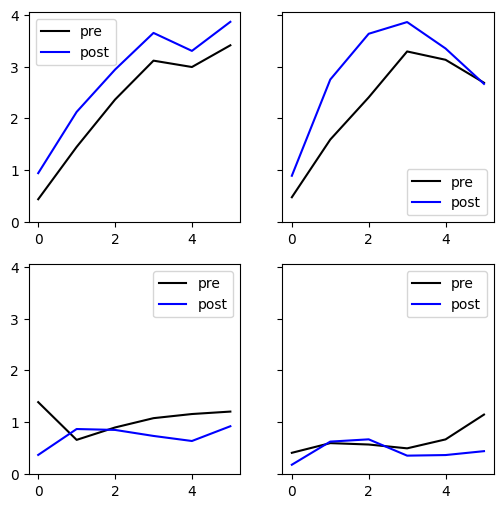

In [259]:
fig,axs = plt.subplots(2,2,figsize = ((6,6)), sharey = True)


axs[0,0].plot(ProcessedConditionData[0,2,0][0,:], label = 'pre', color = 'black')
axs[0,0].plot(ProcessedConditionData[0,2,0][1,:], label = 'post', color = 'blue')
axs[0,0].legend()

axs[0,1].plot(ProcessedConditionData[0,3,0][0,:], label = 'pre', color = 'black')
axs[0,1].plot(ProcessedConditionData[0,3,0][1,:], label = 'post', color = 'blue')
axs[0,1].legend()

axs[1,0].plot(ProcessedConditionData[0,2,1][0,:], label = 'pre', color = 'black')
axs[1,0].plot(ProcessedConditionData[0,2,1][1,:], label = 'post', color = 'blue')
axs[1,0].legend()

axs[1,1].plot(ProcessedConditionData[0,3,1][0,:], label = 'pre', color = 'black')
axs[1,1].plot(ProcessedConditionData[0,3,1][1,:], label = 'post', color = 'blue')
axs[1,1].legend()


(2, 6)
3.410183877227235


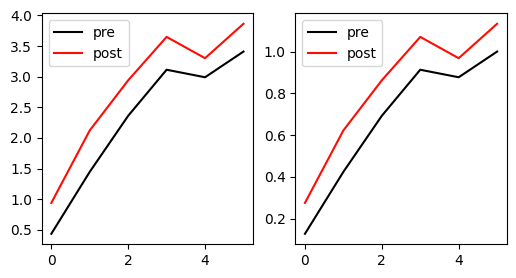

In [262]:
normDataIn = ProcessedConditionData[0,2,0]
print(normDataIn.shape)

fig,axs = plt.subplots(1,2,figsize = ((6,3)))

axs[0].plot(normDataIn[0,:], color = 'black', label = 'pre')
axs[0].plot(normDataIn[1,:], label = 'post')
axs[0].legend()

max_AmpVal = np.max(normDataIn[0,:])
print(max_AmpVal)

normDataOut = normDataIn / max_AmpVal

axs[1].plot(normDataOut[0,:], color = 'black', label = 'pre')
axs[1].plot(normDataOut[1,:], label = 'post')
axs[1].legend()